In [1]:
import glob
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from Functions.class_Graph_TM import Graph_TM
from networkx.algorithms.cluster import *
from networkx.algorithms.bridges import *
from networkx.algorithms.distance_measures import *
from networkx.algorithms.shortest_paths.generic import *

In [2]:
files = sorted(glob.glob('Data/*.csv'))
G = Graph_TM()
G.insert_cbs(files)

Graph saved as ../TeX/img/all_comic_books_all_components.png


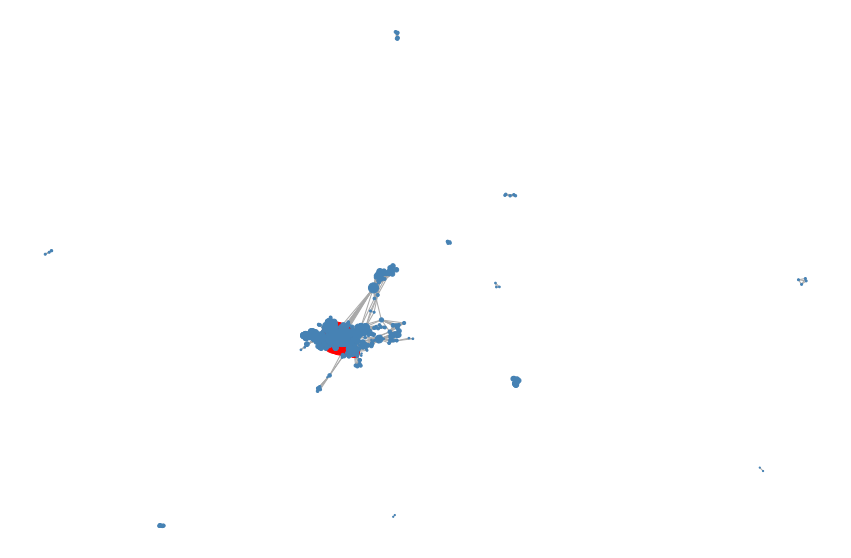

In [3]:
G.plot_network(max_node_size = 1000,
               max_connected_components = 'all',
               filename = 'all_comic_books_all_components')

Graph saved as ../TeX/img/all_comic_books_biggest_component.png


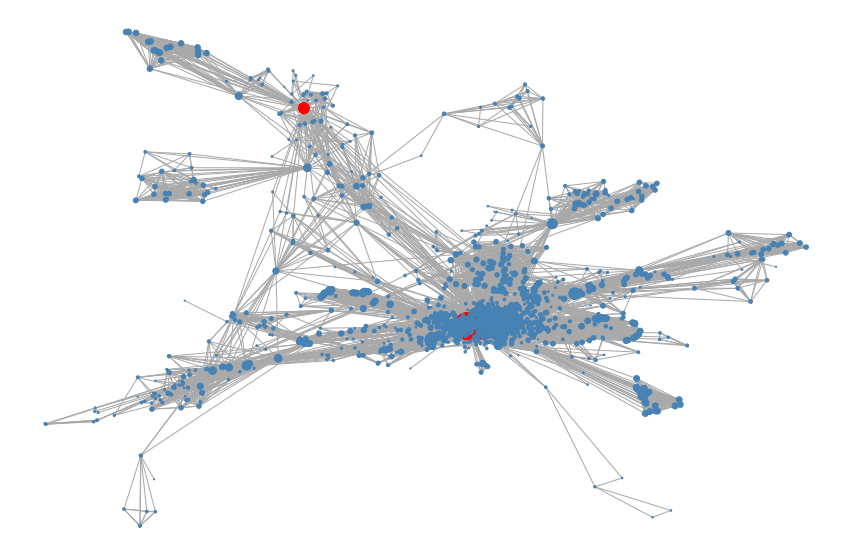

In [4]:
G.plot_network(max_node_size = 1000,
               filename = 'all_comic_books_biggest_component')

In [5]:
connected_components = list(nx.connected_components(G.Graph))
GN = G.Graph.number_of_nodes()
GL = G.Graph.number_of_edges()
G_degrees = np.array(G.Graph.degree)[:,1].astype(int)
G_density = 2 * GL / (GN * (GN - 1))
G_std_degree = G_degrees.std()
G_max_degree = G_degrees.max()
G_hbridges = has_bridges(G.Graph)
if G_hbridges:
    G_bridges = list(bridges(G.Graph))
    
print(nx.info(G.Graph))
print(f'Density: {G_density:.4f}')
print(f'Maximum degree: {G_max_degree}')
print(f'Degree Standard Deviation: {G_std_degree:.4f}')
print(f'Connected components: {len(connected_components)}')
if G_hbridges:
    print('Bridges:')
    for i in range(len(G_bridges)):
        print(f'{i + 1:2d} - {G_bridges[i]}')

Name: 
Type: Graph
Number of nodes: 1591
Number of edges: 11270
Average degree:  14.1672
Density: 0.0089
Maximum degree: 736
Degree Standard Deviation: 34.0337
Connected components: 12
Bridges:
 1 - ('Magali', 'Anjo da Guarda da Magali')
 2 - ('Maria Cebolinha', 'gibi 13 Figurante 4')
 3 - ('Marina', 'Gato')
 4 - ('Marina', 'Sapo')
 5 - ('Imperador Japonês Sec XVI', '#1tmj03 Guarda 1')
 6 - ('Astronauta', 'Astronauta do Futuro')
 7 - ('Astronauta', 'Povo Alienígena Verde')
 8 - ('Penadinho', 'Gato laranja')
 9 - ('Penadinho', 'Funcionário Parque')
10 - ('Zé Vampir', 'gibi 3 Figurante 8')
11 - ('Bidu', 'Chinês')
12 - ('Piteco', 'Dinossauro verde')
13 - ('Piteco', 'Gronk')
14 - ('Princesa Usagi Mimi', '#1tmj06 Servo Robô 1')
15 - ('Humberto', 'Salva-vidas')
16 - ('Humberto', 'Eco')
17 - ('Chico Bento', 'Hiro')
18 - ('gibi 8 Figurante 6', 'gibi 8 Figurante 8')
19 - ('Zé Esquecido', 'gibi 10 Criança 13')
20 - ('Homem 1', 'gibi 10 Criança 14')
21 - ('gibi 17 Figurante 19', 'gibi 17 Figurant

In [6]:
# working only with the greatest connected component
H = nx.subgraph(G.Graph, connected_components[0])
avg_distance = nx.average_shortest_path_length(H)
H_diameter = diameter(H)
H_degrees = np.array(H.degree)[:,1].astype(int)
HN = H.number_of_nodes()
HL = H.number_of_edges()
H_density = 2 * HL / (HN * (HN - 1))
H_std_degree = H_degrees.std()
H_max_degree = H_degrees.max()
H_hbridges = has_bridges(H)
if H_hbridges:
    H_bridges = list(bridges(H))
print(nx.info(H))
print(f'Density: {H_density:.4f}')
print(f'Maximum degree: {H_max_degree}')
print(f'Degree Standard Deviation: {H_std_degree:.4f}')
print(f'Diameter: {H_diameter}')
print(f'Average distance: {avg_distance:.4f}')
print(f'ln(N)/ln(<k>): {np.log(HN) / np.log(2 * HL / HN):.4f}')
if H_hbridges:
    print('Bridges:')
    for i in range(len(H_bridges)):
        print(f'{i + 1:2d} - {H_bridges[i]}')

Name: 
Type: Graph
Number of nodes: 1524
Number of edges: 11003
Average degree:  14.4396
Density: 0.0095
Maximum degree: 736
Degree Standard Deviation: 34.7315
Diameter: 7
Average distance: 2.7894
ln(N)/ln(<k>): 2.7450
Bridges:
 1 - ('Magali', 'Anjo da Guarda da Magali')
 2 - ('Maria Cebolinha', 'gibi 13 Figurante 4')
 3 - ('Marina', 'Gato')
 4 - ('Marina', 'Sapo')
 5 - ('Imperador Japonês Sec XVI', '#1tmj03 Guarda 1')
 6 - ('Astronauta', 'Astronauta do Futuro')
 7 - ('Astronauta', 'Povo Alienígena Verde')
 8 - ('Penadinho', 'Gato laranja')
 9 - ('Penadinho', 'Funcionário Parque')
10 - ('Zé Vampir', 'gibi 3 Figurante 8')
11 - ('Bidu', 'Chinês')
12 - ('Piteco', 'Dinossauro verde')
13 - ('Piteco', 'Gronk')
14 - ('Humberto', 'Salva-vidas')
15 - ('Humberto', 'Eco')
16 - ('Chico Bento', 'Hiro')
17 - ('gibi 8 Figurante 6', 'gibi 8 Figurante 8')
18 - ('Zé Esquecido', 'gibi 10 Criança 13')
19 - ('Homem 1', 'gibi 10 Criança 14')


In [7]:
nodes = list(H.nodes())
paths = dict(shortest_path(H))
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        u = nodes[i]
        v = nodes[j]
        if len(paths[u][v]) == (H_diameter + 1):
            arrow = ' -> '
            print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
            print()

Path from gibi 10 Criança 14 to Cafuné:
gibi 10 Criança 14 -> Homem 1 -> Dona Morte -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Cafuné

Path from gibi 10 Criança 14 to Outro Índio:
gibi 10 Criança 14 -> Homem 1 -> Dona Morte -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Outro Índio

Path from Cafuné to gibi 15 Criança 12:
Cafuné -> Papa-Capim -> Onça -> Borboleta -> Mônica -> gibi 15 Criança 11 -> Nico Demo -> gibi 15 Criança 12

Path from Cafuné to gibi 15 Criança 14:
Cafuné -> Papa-Capim -> Onça -> Borboleta -> Mônica -> gibi 15 Criança 11 -> Nico Demo -> gibi 15 Criança 14

Path from Outro Índio to gibi 15 Criança 12:
Outro Índio -> Papa-Capim -> Onça -> Borboleta -> Mônica -> gibi 15 Criança 11 -> Nico Demo -> gibi 15 Criança 12

Path from Outro Índio to gibi 15 Criança 14:
Outro Índio -> Papa-Capim -> Onça -> Borboleta -> Mônica -> gibi 15 Criança 11 -> Nico Demo -> gibi 15 Criança 14



Graph saved as ../TeX/img/communities_all_components.png


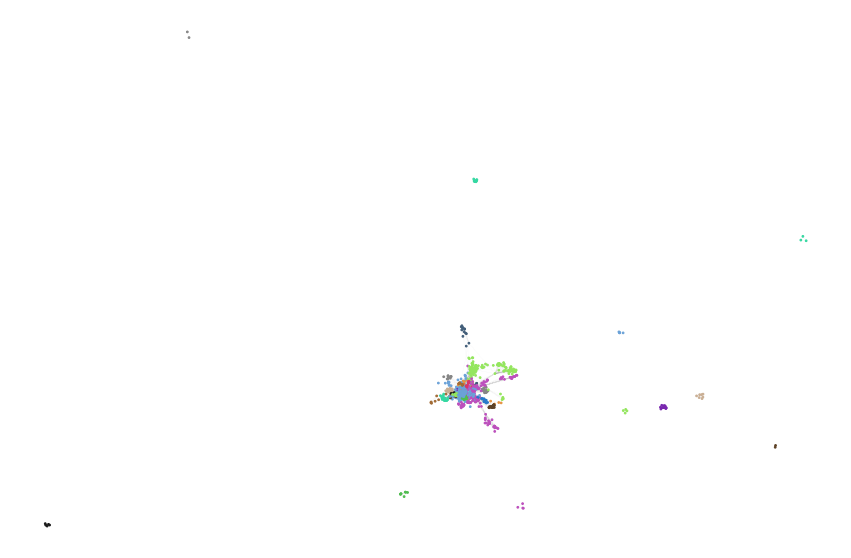

In [8]:
G.plot_communities(max_connected_components = 'all',
                   filename = 'communities_all_components')

Graph saved as ../TeX/img/communities_biggest_component.png


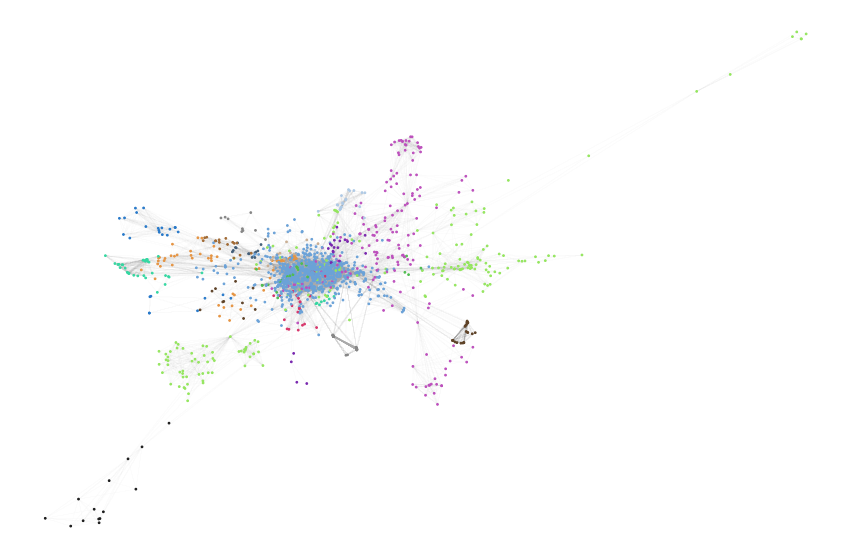

In [9]:
G.plot_communities(filename = 'communities_biggest_component')

In [10]:
H['Cascão']['Cebolinha']

{'weight': 515.0, 'community': 1}

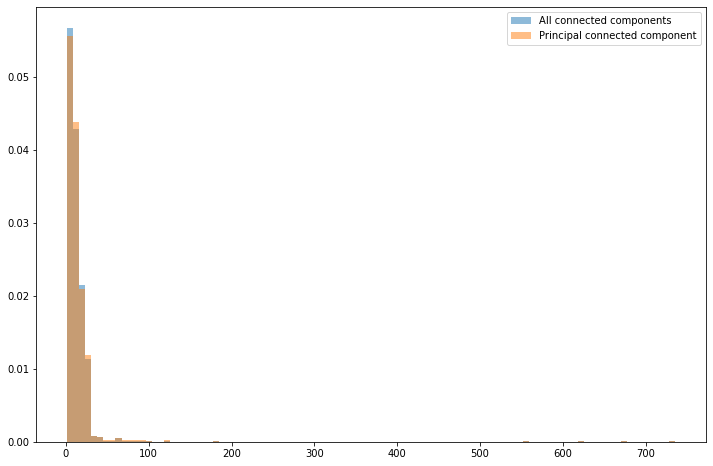

In [11]:
# degree distribuition
plt.figure(figsize = (12, 8))
plt.hist(G_degrees,
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'All connected components')

plt.hist(H_degrees,
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Principal connected component')

plt.legend(loc = 'upper right')
plt.show()

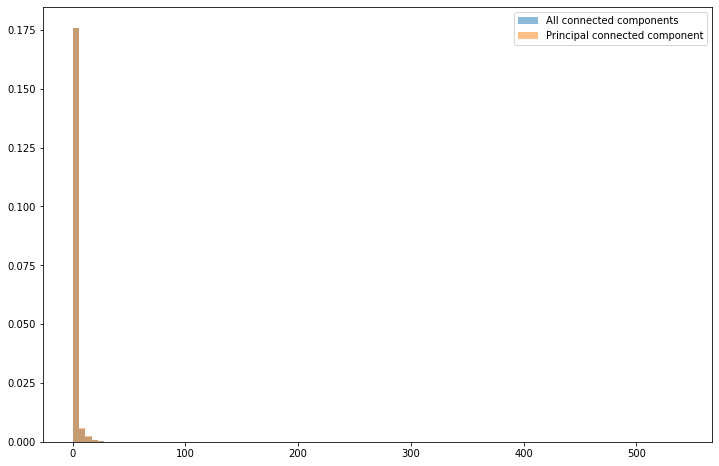

In [12]:
# weight distribuition
plt.figure(figsize = (12, 8))
plt.hist([float(G.Graph[u][v]['weight']) for u, v in G.Graph.edges()],
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'All connected components')

plt.hist([float(H[u][v]['weight']) for u, v in H.edges()],
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Principal connected component')

plt.legend(loc = 'upper right')
plt.show()

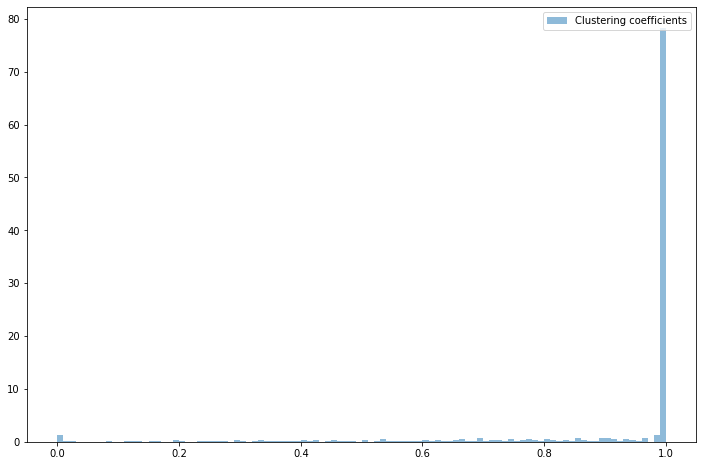

In [13]:
graph_clustering = clustering(H)
avg_clustering = average_clustering(H)
global_clustering = transitivity(H)
avg_clustering, global_clustering

# clustering coefficients distribuition
plt.figure(figsize = (12, 8))
plt.hist(list(graph_clustering.values()),
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Clustering coefficients')

plt.legend(loc = 'upper right')
plt.show()

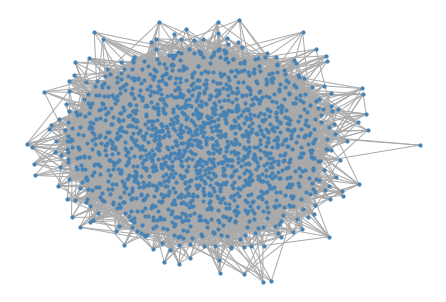

In [14]:
p_ER_Graph = H_density
ER_n_nodes = HN
ER_Graph = nx.Graph()
for u in range(ER_n_nodes):
    for v in range(u + 1, ER_n_nodes):
        if np.random.random() < p_ER_Graph:
            ER_Graph.add_edge(u, v)
            
nx.draw(ER_Graph,
        node_size = 10,
        edge_color = 'darkgray',
        node_color = 'steelblue')

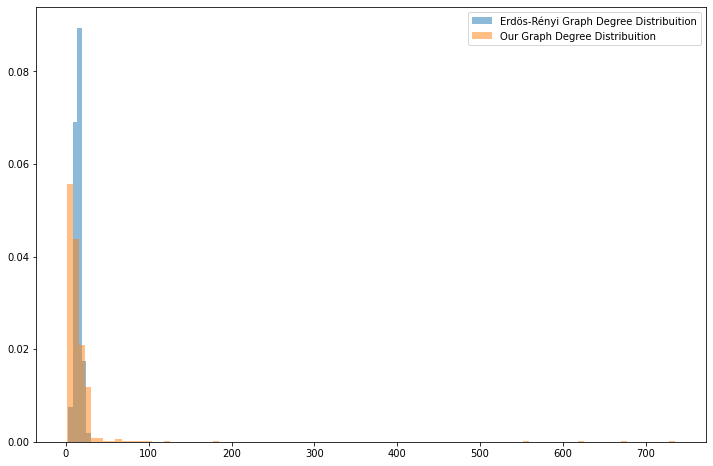

In [15]:
# comparing degree distribuitions
plt.figure(figsize = (12, 8))
plt.hist(list(np.array(ER_Graph.degree)[:,1].astype(int)),
         bins = 5,
         density = True,
         alpha = 0.5,
         label = 'Erdös-Rényi Graph Degree Distribuition')

plt.hist(H_degrees,
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Our Graph Degree Distribuition')

plt.legend(loc = 'upper right')
plt.show()